In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('files/dataset.csv')
df.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Unemployed,Gold (Close),USD (Close),Oil (Close),Tourists,Cars,ImportExport,IndustryProd,CommerceInvest,Inflation
Date,,,,,,,,,,
2011-02-01,2150233.0,1339.599976,2.8199,101.739998,1232497.0,67610.0,110.28,110.5,13.7,3.6
2011-03-01,2133916.0,1430.699951,2.8954,115.419998,1449978.0,67610.0,112.79,106.2,15.1,4.3
2011-04-01,2043516.0,1428.099976,2.8224,118.699997,1510034.0,69213.0,111.05,106.5,19.3,4.5
2011-05-01,1962587.0,1485.250000,2.7942,116.614998,2006688.0,69213.0,106.81,107.9,17.0,5.0
2011-06-01,1883299.0,1542.400024,2.7660,114.529999,2254963.0,69213.0,105.07,102.5,20.0,4.2


In [3]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.drop('Unemployed', axis=1))

colnames = list(df.columns)
colnames.remove('Unemployed')
scaled_df = pd.DataFrame(scaled, columns=colnames, index=df.index)
scaled_df

,Gold (Close),USD (Close),Oil (Close),Tourists,Cars,ImportExport,IndustryProd,CommerceInvest,Inflation
Date,,,,,,,,,
2011-02-01,-0.614140,-1.928724,0.919501,-1.266759,-1.316417,0.695071,0.855754,0.397503,-0.014110
2011-03-01,-0.280834,-1.758497,1.446586,-1.014713,-1.316417,0.982681,0.227908,0.574207,0.136948
2011-04-01,-0.290346,-1.923087,1.572962,-0.945112,-1.254537,0.783302,0.271711,1.104319,0.180108
2011-05-01,-0.081252,-1.986668,1.492628,-0.369523,-1.254537,0.297459,0.476126,0.814020,0.288006
2011-06-01,0.127842,-2.050250,1.412294,-0.081788,-1.254537,0.098081,-0.312332,1.192671,0.115368
...,...,...,...,...,...,...,...,...,...
2023-09-01,1.581804,1.050808,0.411296,1.440445,0.408040,-1.346842,-1.159194,-0.713208,0.978557
2023-10-01,1.653149,1.139304,0.335778,0.762039,0.909527,-1.338821,-0.385337,-0.397665,0.633281
2023-11-01,1.724493,1.227799,0.260260,0.232779,0.909527,-1.449969,-0.721162,-0.713208,0.633281


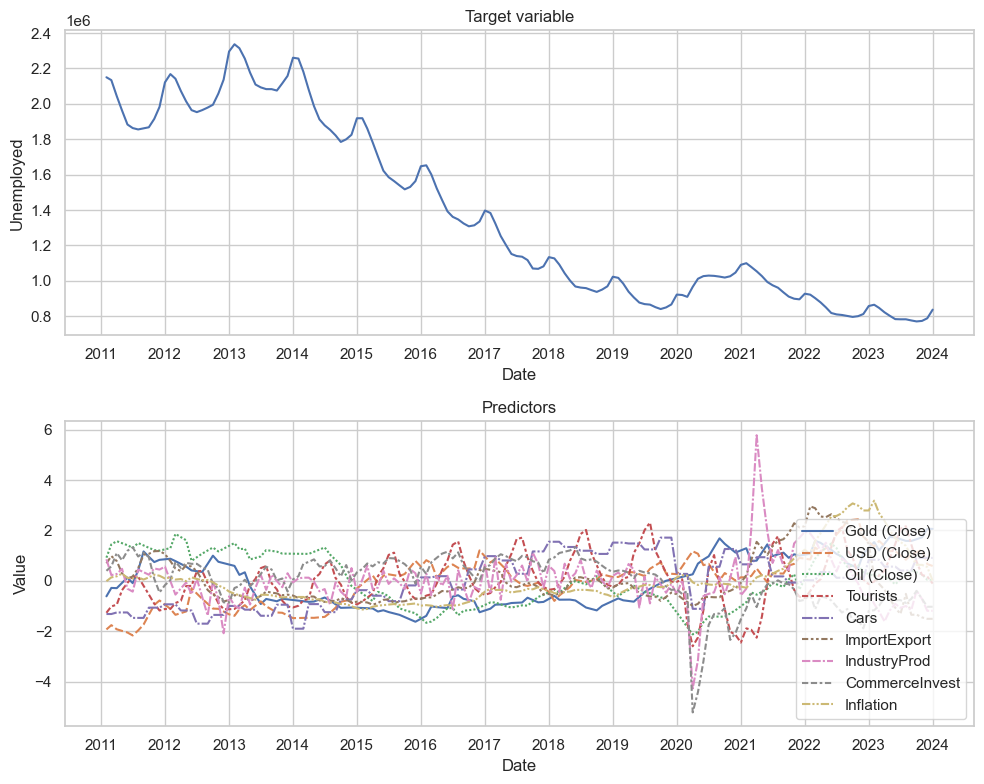

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(2,1, figsize=[10, 8])
sns.lineplot(df['Unemployed'], ax=ax[0])
sns.lineplot(scaled_df, ax=ax[1])

years = mdates.YearLocator()
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_ylabel('Value')
ax[0].set_title('Target variable')
ax[1].set_title('Predictors')

plt.tight_layout()
plt.show()

# SHAP

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
# all variables will be predicators
X = scaled_df
y = df['Unemployed'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# evaluate model on test set
y_pred = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 23221940414.142704


In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 9), (32, 9), (124,), (32,))

In [8]:
res = pd.DataFrame(y_test)
res['y_pred'] = y_pred

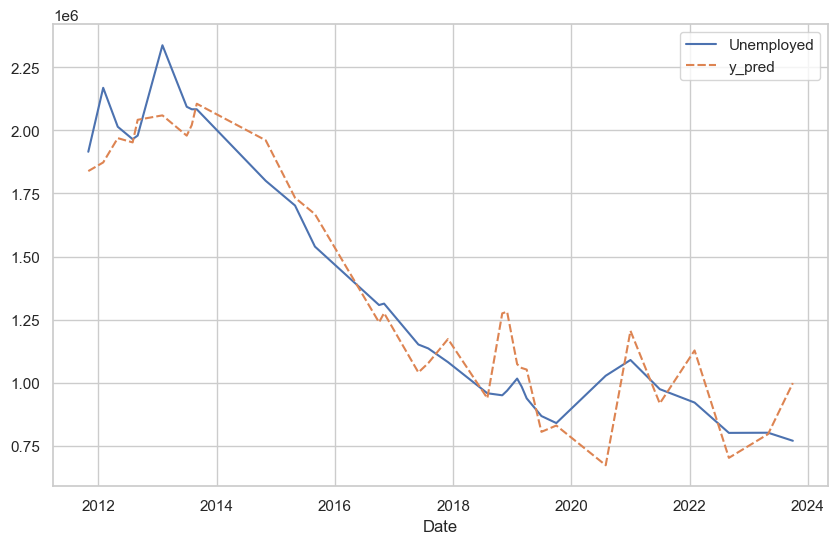

In [9]:
fig, ax = plt.subplots(figsize=[10, 6])
sns.lineplot(res)
plt.show()

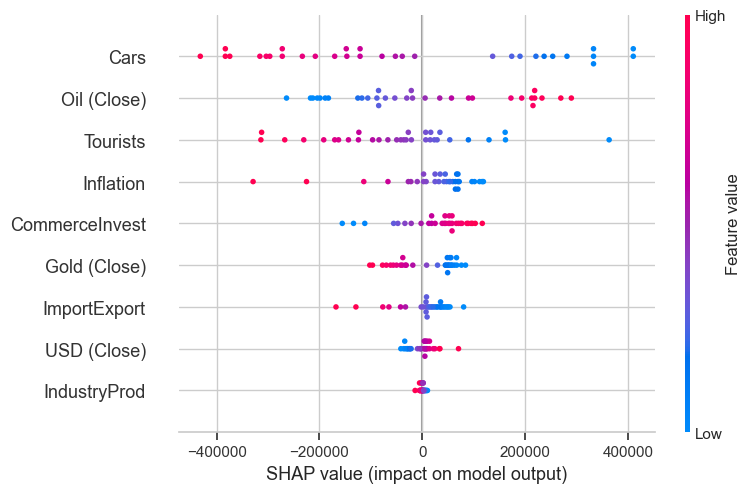

In [10]:
import shap

# Inicjalizacja Explainera SHAP z wytrenowanym modelem
explainer = shap.Explainer(model1, X_train) 

# Obliczenie wartości SHAP
shap_values = explainer(X_test)

# Wyświetlenie wyników
shap.summary_plot(shap_values, X_test)


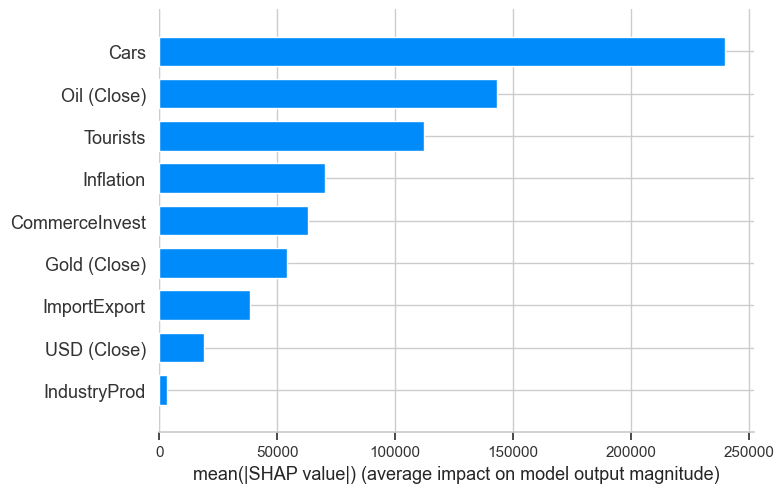

In [11]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

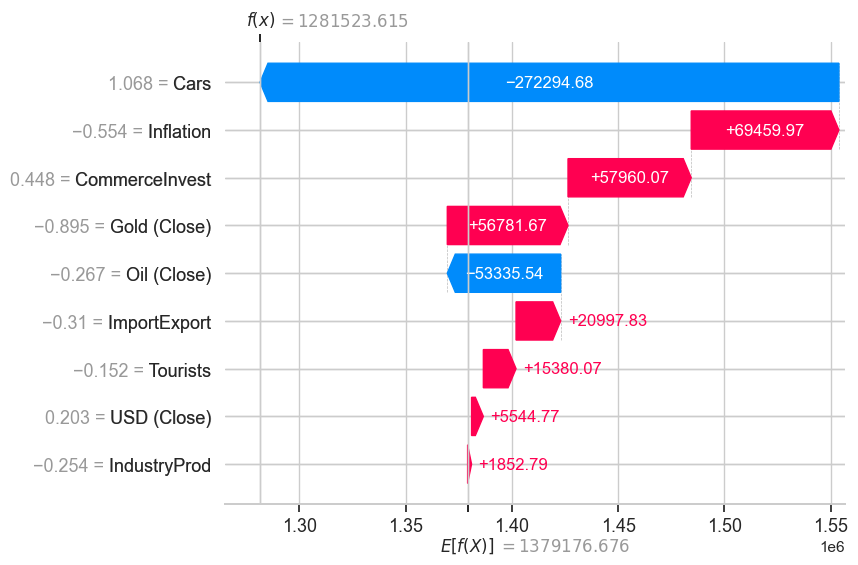

In [12]:
shap.plots.waterfall(shap_values[6])